# Data Science Salaries

En aquest treball treballem sobre 2 bases de dades sobre els salaris en la ciència de dades, $\textit{Data Science Salaries 2023}$ 💸 (son dades desde el 2020 fins al 2023) i $\textit{Data Science Job Salaries}$ (dades entre el 2020 i 2022). 

- https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data

- https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Les dues bases de dades tenen els mateixos atributs. L'objectiu principal del treball és estudiar els atributs més importants per a millorar el sou com a analista de dades, i també, a partir de les dades inicials, construir un model de regressió per predir el salari d'un treballador. 

## Reading Data...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_name = 'ds_salaries'
df1 = pd.read_csv(f'data/{dataset_name}.csv')
df2 = pd.read_csv(f'data/{dataset_name}_2.csv')

In [3]:
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
df2

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


El nostre problema de regressió tracta sobre predir el salari depenent les teves dades, com podem observar a la base de dades tenim 2 variables relacionades amb el sou, 'salary_in_usd' i 'salary', com 'salary_in_usd' és la variable respecte al salari global, eliminem 'salary' i canviem el nom de 'salary_in_usd' per comoditat.

In [5]:
# Eliminem atributs innecesaris
att_to_delete = ['salary']
df_1 = df1.drop(att_to_delete, axis=1)

att_to_delete_df2 = att_to_delete
att_to_delete_df2.append(df2.columns[0])
df_2 = df2.drop(att_to_delete_df2, axis=1)
# Concatenem els datasets
df = pd.concat([df_1, df_2], ignore_index=True)
df = df.rename(columns={'salary_in_usd':'salary'})
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
4357,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
4358,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
4359,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
4360,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


## Exploratory Data Analysis

### Quantitat i tipus d'atributs

Abans de res, anem a observar quants atributs tenim, el tipus, com el nombre de entrades...

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4362 non-null   int64 
 1   experience_level    4362 non-null   object
 2   employment_type     4362 non-null   object
 3   job_title           4362 non-null   object
 4   salary_currency     4362 non-null   object
 5   salary              4362 non-null   int64 
 6   employee_residence  4362 non-null   object
 7   remote_ratio        4362 non-null   int64 
 8   company_location    4362 non-null   object
 9   company_size        4362 non-null   object
dtypes: int64(3), object(7)
memory usage: 340.9+ KB


,work_year,salary,remote_ratio
count,4362.000000,4362.000000,4362.000000
mean,2022.238881,134053.558230,49.701972
std,0.768427,64797.957697,48.325818
min,2020.000000,2859.000000,0.000000
25%,2022.000000,90000.000000,0.000000
50%,2022.000000,130000.000000,50.000000
75%,2023.000000,173000.000000,100.000000
max,2023.000000,600000.000000,100.000000


Podem observar que tenim 9 variables, de les quals 3 són numèriques i les altres 6 són objectes, més endavant farem un tractament de les variables no numèriques. També podem veure que tenim 4362 entrades. 

De les dades numèriques podem observar que els anys que tractarem en aquesta base de dades van desde el 2020 fins al 2023, ja que la mitjana d'anys es molt propera a 2022 podem intuir que la moltes de les entrades registrades seràn d'aquest any. 

La mijana del salari és de 134.053, del que podem intuir que es el salari anual, i ja que té una desviació de 64.797 indica una gran dispersió en els salaris, això es veu refelctat clarament en el salari mínim i màxim, 2.859 i 600.000 respectivament, indici de que pot ser que tinguem outliers a la base de dades.

Amb els percentils de la variable $\textit{remote\_ratio}$ podem observar que hi ha una polarització evident, ja que el percentil del 25% és 0 (treball presencial) i el del 75% és 100 (treball completament remot), això també pot ser degut a que aquesta variable pot ser no és una variable continua si no discreta.

### Detecció de NaNs i entrades duplicades

Ja podem observar que en les variables numèriques les dades no tindran NaNs, ja que com hem vist anteriorment tenim 4362 entrades, i amb la funció $\textit{.describe()}$ observem que el recompte de dades en aquestes variables és exactament 4362. Tot i això, no podem assegurar que a les dades categòriques succeïx el mateix, aleshores ho comprovem:

In [7]:
print("NaNs")
print(df.isna().sum())
print(f"Dades duplicades: {df.duplicated().sum()}")

NaNs
work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Dades duplicades: 1694


Com no tenim cap Nan, no hem de fer cap tractament sobre aquests. Tot i això tenim 1694 dades repetides, les eliminem:

In [8]:
df.drop_duplicates(inplace=True)
print(f"Entrades duplicades eliminades, entrades final: {df.shape[0]}")

Entrades duplicades eliminades, entrades final: 2668


Un cop tenim les dades netes, observarem com es distrubueixen les variables, quins valors prenen les variables categòriques, el salari mig per a les diferents variables...

### Variables categòriques

Primer veiem els valors que poden prendre les variables categòriques i després farem un tractament a la variable $\textit{remote\_ratio}$ ja que intuïm que pot ser categòrica també:

In [9]:
categorical_vars = list(df.select_dtypes(include=['object']).columns)
for v in categorical_vars:
    print(f"{v}:")
    print(f"{len(df[v].unique())} valors diferents: {df[v].unique()[:10]} {'...' if len(df[v].unique()) > 10 else ''}\n")

experience_level:
4 valors diferents: ['SE' 'MI' 'EN' 'EX'] 

employment_type:
4 valors diferents: ['FT' 'CT' 'FL' 'PT'] 

job_title:
95 valors diferents: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer'] ...

salary_currency:
21 valors diferents: ['EUR' 'USD' 'INR' 'HKD' 'CHF' 'GBP' 'AUD' 'SGD' 'CAD' 'ILS'] ...

employee_residence:
78 valors diferents: ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL'] ...

company_location:
72 valors diferents: ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH'] ...

company_size:
3 valors diferents: ['L' 'S' 'M'] 



In [10]:
variable = "remote_ratio"
print(df[variable].unique())
categorical_vars.append(variable)

[100   0  50]


Ja que les variables $\textit{experience\_level}$, $\textit{employment\_type}$ i $\textit{company\_size}$ tenen pocs atributs i poden portar a confussió i malentesos les reanomenarem, també farem el mateix amb $\textit{remote\_ratio}$, perquè finalment, com havíem intuït, no es tracta d'una variable numèrica, sinó categòrica: 
- 'company_size': 'S'->'Small', 'M'->'Medium', 'L'->'Large'
- 'remote_ratio': 100->'Online', 50->'Blended' (semipresencial), 0->'Face-to-face' (presencial)
- 'employment_type': 'FT'->'Full time', 'CT'->'Contractual', 'PT'->'Part time', 'FL'->'Freelancer'
- 'experience_level': 'SE'->'Senior', 'MI'->'Mid level', 'EN'->'Entry level', 'EX'->'Executve level'

In [11]:
df['company_size'] = df['company_size'].replace({'S':'Small', 'M':'Medium','L':'Large'})
df['remote_ratio'] = df['remote_ratio'].replace({100: 'Online', 0:'Face-to-face', 50:'Blended'})
df['employment_type'] = df['employment_type'].replace({'FT':'Full_time', 'CT':'Contractual','PT':'Part_time', 'FL':'Freelancer'})
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid_level', 'EN':'Entry_level', 'EX': 'Executive_level'})

 ### Distribució de les variables

Un cop hem canviat el nom d'alguns atributs i les nostres dades són més clares, anem a veure com es distribueixen les variables:

In [12]:
def distribucio_variable(var, data = df, max_index=15, reverse = False):
    if len(data[var].unique()) > max_index:
        counts_var = data[var].value_counts().head(max_index)
    else:
        counts_var = data[var].value_counts() 
    if reverse == False:
        sns.barplot(x=counts_var.index, y=counts_var.values,palette='gnuplot')
        plt.xlabel('Values')
        plt.ylabel('Counts')

    else:
        sns.barplot(x=counts_var.values, y=counts_var.index,palette='gnuplot')
        plt.xlabel('Counts')
        plt.ylabel('Values')
    plt.title(f"Distribution {var}")
    plt.show()

Les variables on passarem $\textbf{reverse = True}$ seran les variables on poden prendre molts valors:

In [13]:
categorical_vars_reverse = ["job_title", "salary_currency", "employee_residence", "company_location"]
categorical_vars_non_reverse = [v for v in categorical_vars if v not in categorical_vars_reverse]

Distribució de variables categòriques:

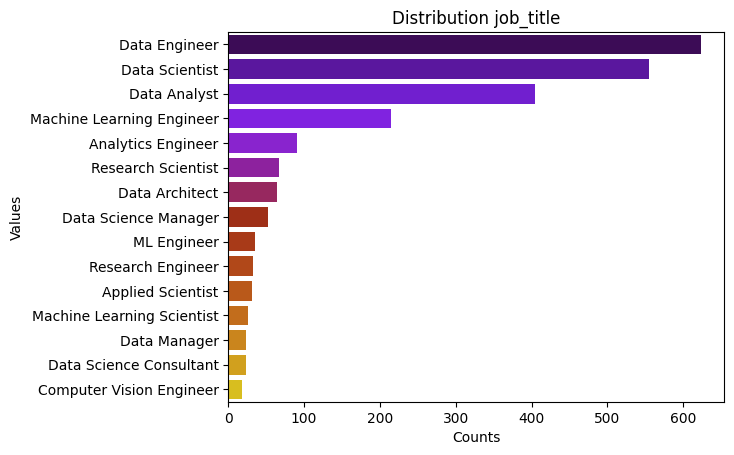

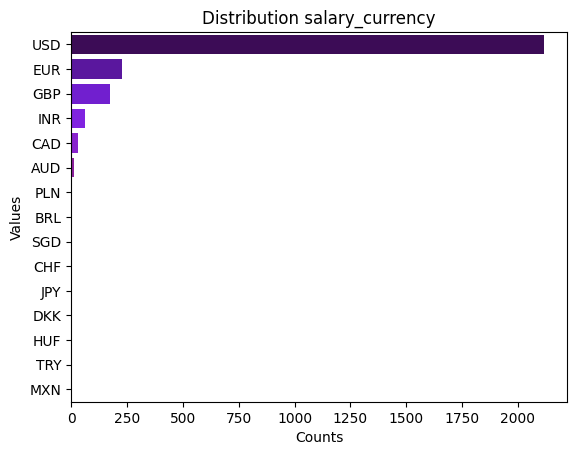

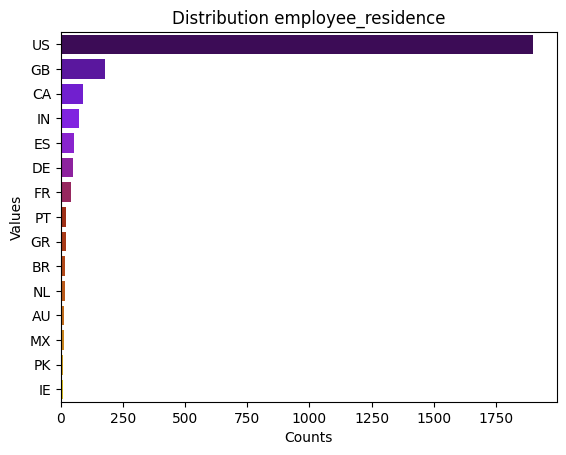

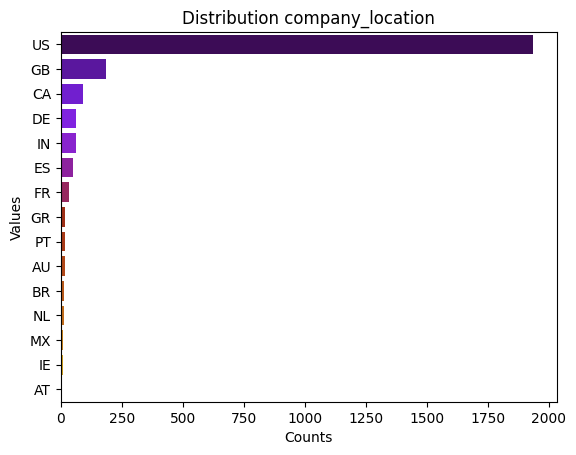

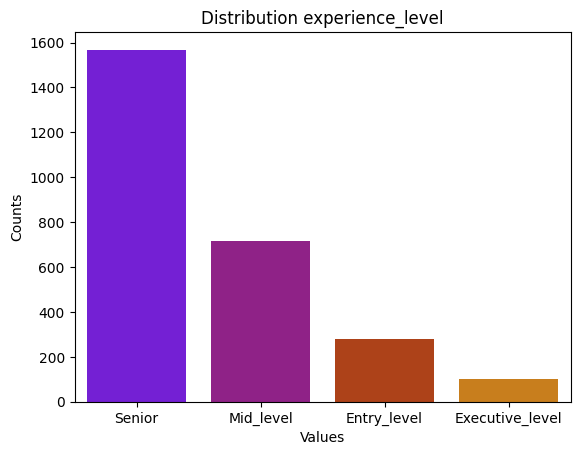

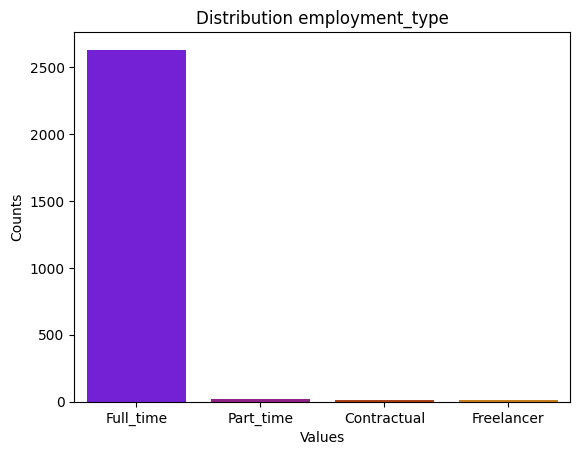

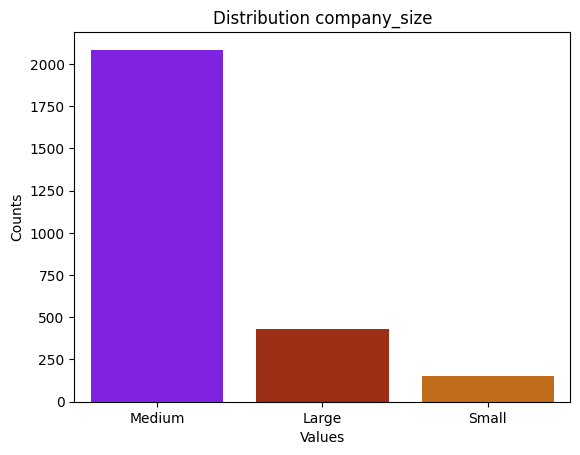

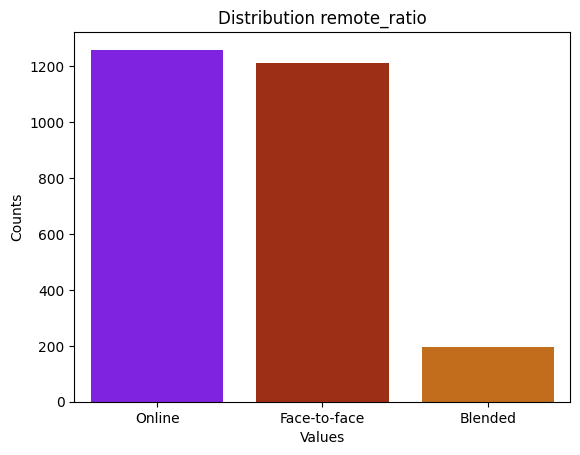

In [14]:
for v in categorical_vars_reverse:
    distribucio_variable(v, reverse = True)
for v in categorical_vars_non_reverse:
    distribucio_variable(v)

Distribució de variables numèriques:

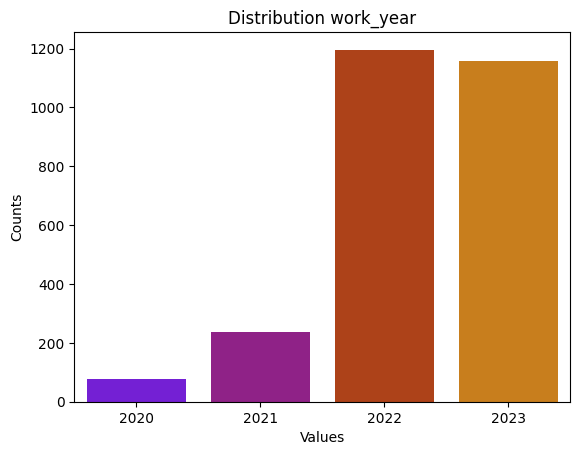

In [16]:
numeric_vars = list(df.select_dtypes(include=['int64']).columns)
numeric_vars_non_reverse = [v for v in numeric_vars if v != "salary"]
for v in numeric_vars_non_reverse:
    distribucio_variable(v)

Com podem observar en aquests histogrames hi ha atributs significativament representats davant d'altres, com poden ser:
- 'USD' a salary_currency
- 'US' a company_location
- 'US' a emplyee_residence
- 'full_time' a empoyment_type

Aquest desequilibri suggereix que les dades estan esbiaixades, ja que gran part de la població no estaria representada en aquestes dades. Això podria implicar que els models de regressió que construirem més endavant se sobreajustin a les dades dominants sense representar l'altra part de la població, dificultant la capacitat de generalitzar en els models, la qual cosa podria derivar en problemes d'overfitting.

### Salari mig

In [18]:
def average_salary_var(var, data = df, max_index = 15, reverse = False):
    average_salary = data.groupby(var)['salary'].mean()
    if len(average_salary) > max_index:
        average_salary = average_salary.head(max_index)
    average_salary = average_salary.sort_values(ascending=False)
    if reverse == True:
        sns.barplot(x=average_salary.values, y=average_salary.index,palette='gnuplot')
        plt.xlim(min(average_salary.values)-5000, max(average_salary.values)+1000)
        plt.xlabel('Average salary')
        plt.ylabel('Values')
    else:
        sns.barplot(x=average_salary.index, y=average_salary.values,palette='gnuplot')
        plt.ylim(min(average_salary.values)-5000, max(average_salary.values)+1000)
        plt.xlabel('Values')
        plt.ylabel('Average salary')
    plt.title(f'Average salary {v}')
    plt.show()

Salari mig per a totes les variables:

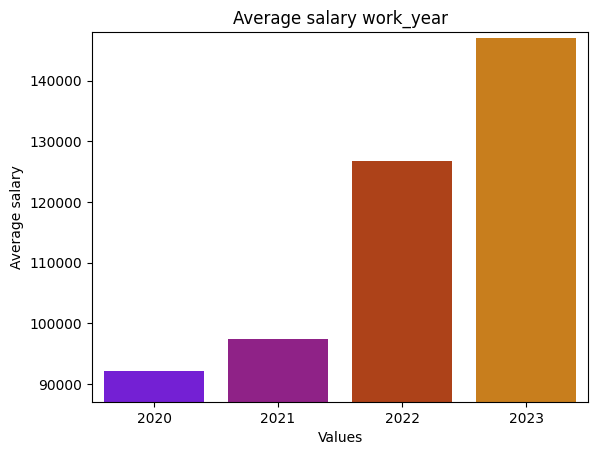

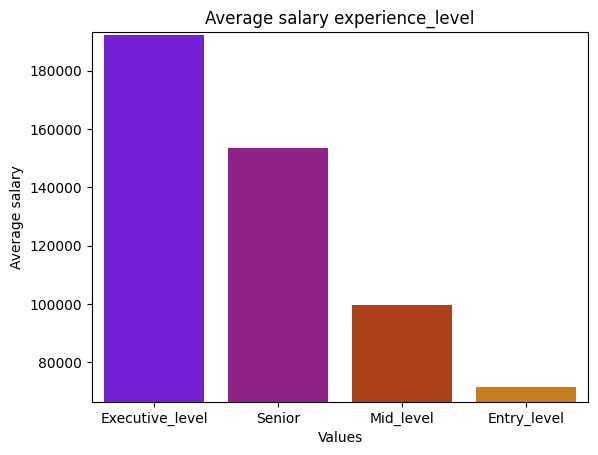

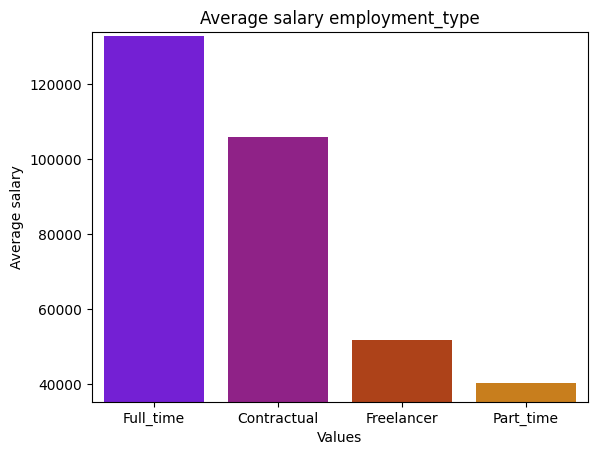

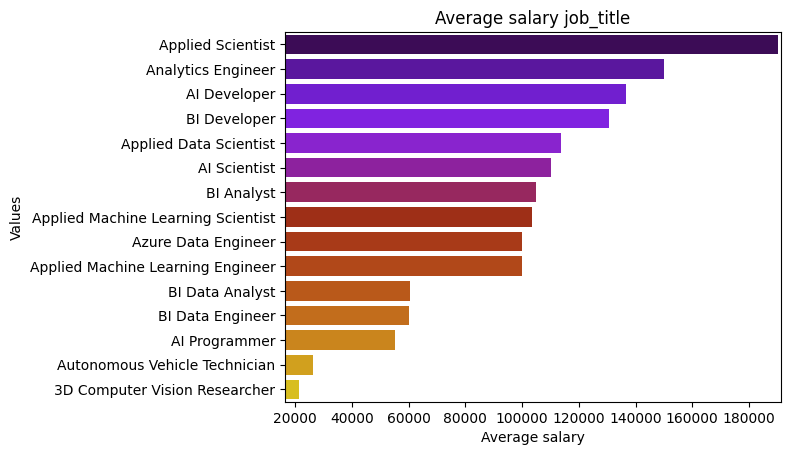

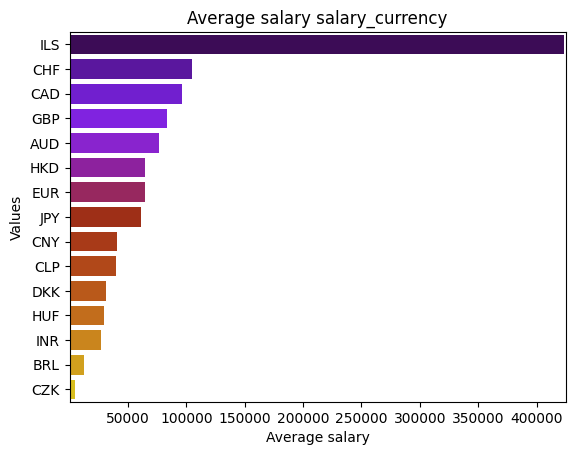

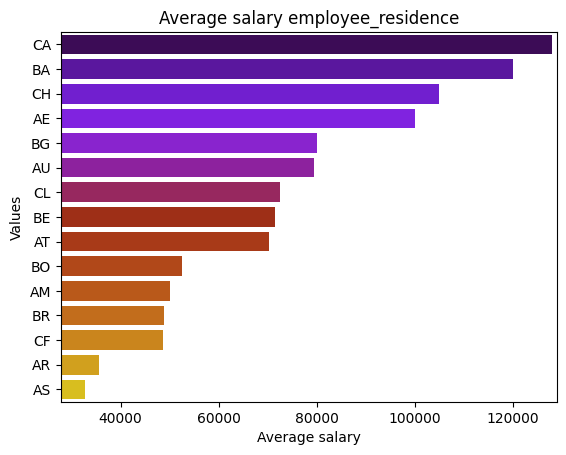

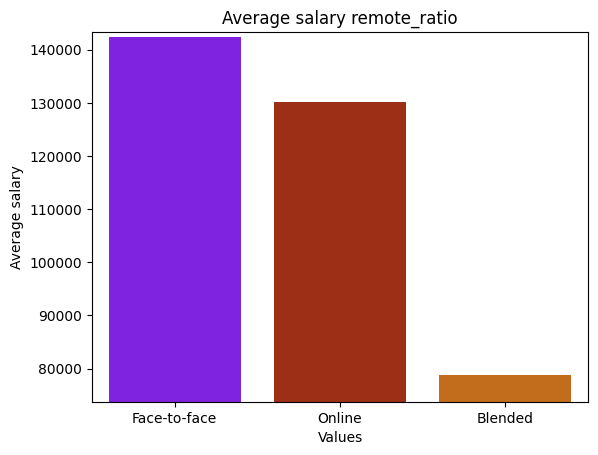

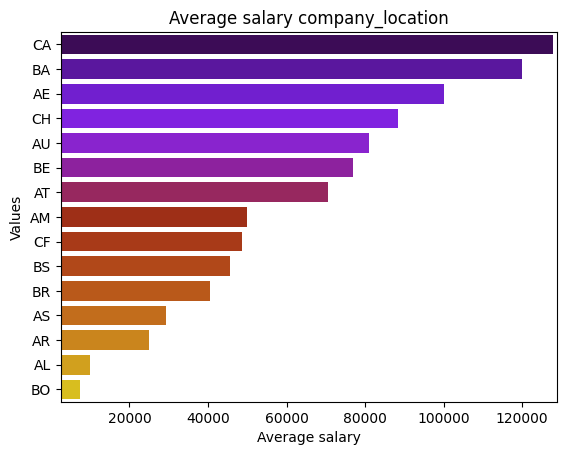

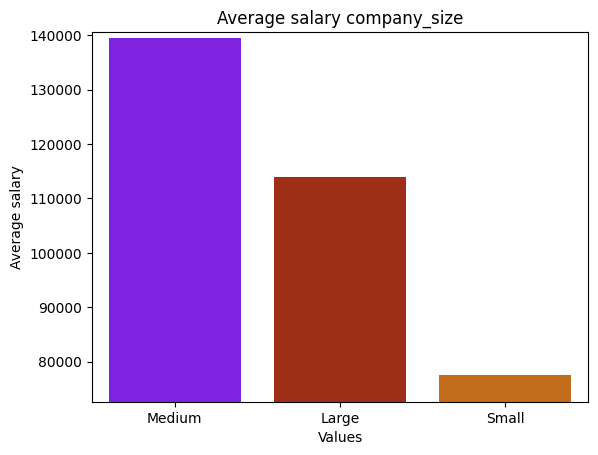

In [19]:
average_salary_vars = [v for v in df.columns if v != "salary"]
average_salary_vars_reverse = ["job_title", "salary_currency","employee_residence","company_location"]
for v in average_salary_vars:
    if v in average_salary_vars_reverse:
        average_salary_var(v, reverse = True)
    else:
        average_salary_var(v)

### $\textbf{TODO: SACAR CONCLUSIONES}$

### Dades categòriques a numèriques

Com que més endavant volem analitzar les característiques més importants per millorar el salari, hem decidit convertir les variables categòriques en numèriques utilitzant Label Encoding. Aquesta estratègia ens permet conservar el mateix nombre d'atributs, fent el procés més eficient i adequat per a models d’arbre com Random Forest o XGBoost. No obstant això, som conscients que en models lineals aquesta codificació podria introduir una falsa ordinalitat, de manera que considerarem alternatives com Target Encoding o Frequency Encoding si calgués assegurar una interpretació més precisa de la importància de les característiques.

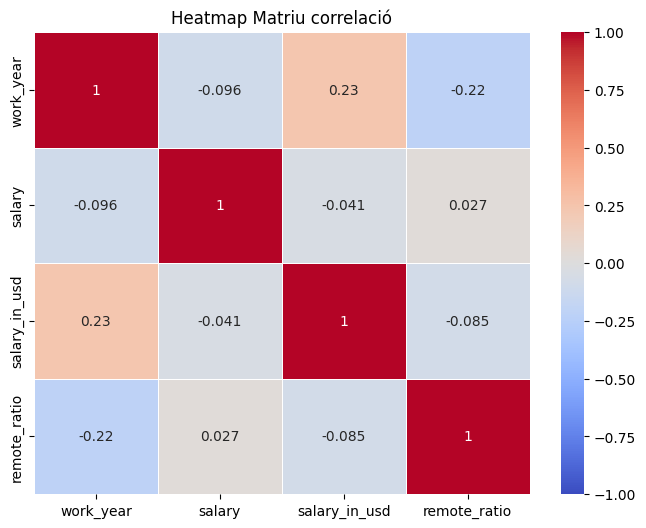

In [9]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Heatmap Matriu correlació")
plt.show()

Nuestros datos estan distribuidos en los siguientes años:

Como podemos observar, los datos correspondientes a los años 2020 y 2021 tienen muy pocas representaciones (78 y 238 registros, respectivamente), en comparación con los años 2022 (1196 registros) y 2023 (1156 registros). Esta desproporción podría suponer un problema cuando intentemos realizar una regresión, ya que la baja representación de 2020 y 2021 puede influir negativamente en el ajuste del modelo.

Veamos los 15 títulos más frecuentes:

Vamos a calcular el salario anual promedio de los 15 trabajos más frecuentes mostrados en esta última figura:

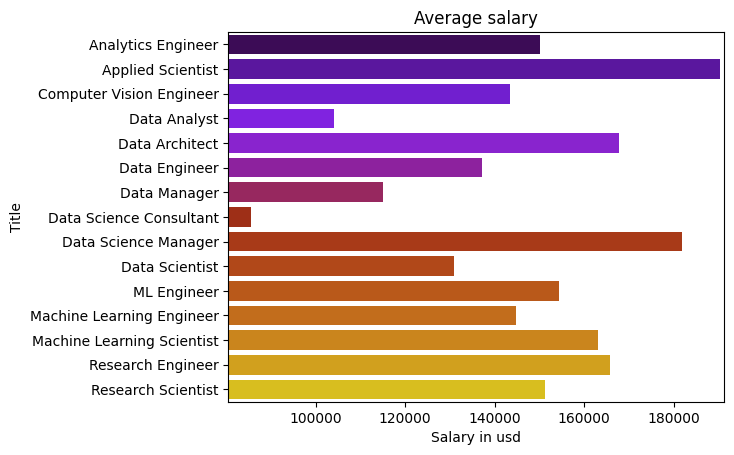

In [14]:
df_jobs = df[df['job_title'].isin(counts_job_title.index)]
average_salary = df_jobs.groupby('job_title')['salary_in_usd'].mean()

sns.barplot(x=average_salary.values, y=average_salary.index,palette='gnuplot')
plt.xlim(min(average_salary.values)-5000, max(average_salary.values)+1000)
plt.xlabel('Salary in usd')
plt.ylabel('Title')
plt.title('Average salary')
plt.show()

Como podemos observar los dos títulos que más destacan son 'Applied Scientist' y 'Data Science Manager', viendo este gráfico, puede ser que tu salario también dependa si eres 'Engineer' o 'Scientist'? A continuación, vamos a calcular los salarios medios más elevados y después veremos los salarios medios de personas que en su título tengan 'Engineer' o 'Scientist'. 

Vamos a ver los top 15 salarios medios más elevados:

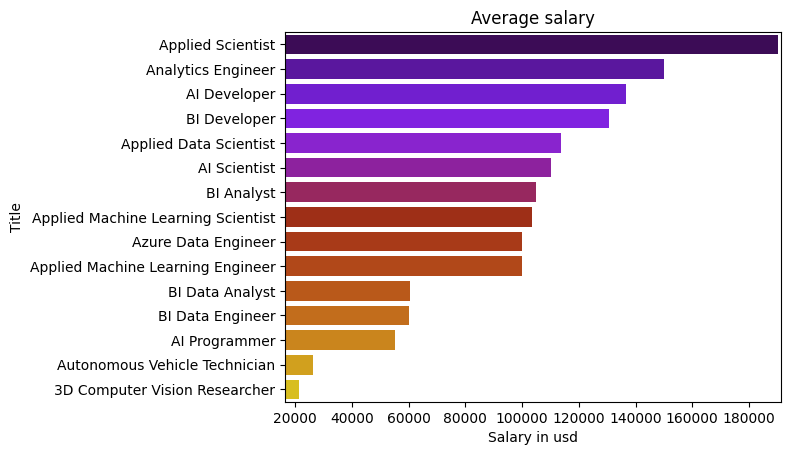

In [15]:
average_salary = df.groupby('job_title')['salary_in_usd'].mean().head(15)
average_salary = average_salary.sort_values(ascending=False)
sns.barplot(x=average_salary.values, y=average_salary.index,palette='gnuplot')
plt.xlim(min(average_salary.values)-5000, max(average_salary.values)+1000)
plt.xlabel('Salary in usd')
plt.ylabel('Title')
plt.title('Average salary')
plt.show()

Veamos los salarios medios de personas que en su título tengan 'Engineer' o 'Scientist':

work_year
2020     85817.689655
2021     97066.752688
2022    132409.894841
2023    156790.935922
Name: salary_in_usd, dtype: float64
118021.3182767361


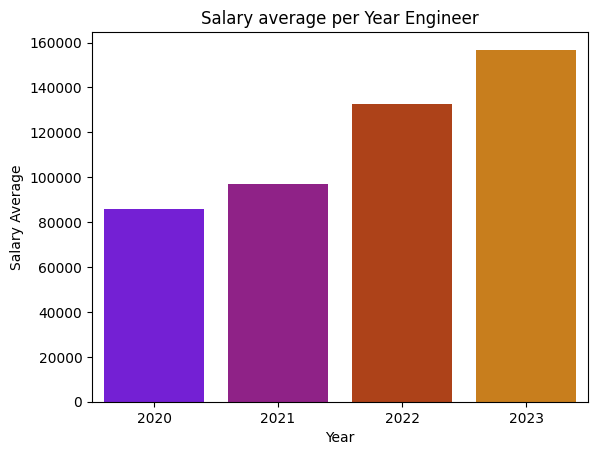

In [16]:
df_eng = df[df['job_title'].str.contains('Engineer', case=False)]
average_salary_df_eng = df_eng.groupby('work_year')['salary_in_usd'].mean()
print(average_salary_df_eng)
print(average_salary_df_eng.mean())

sns.barplot(x=average_salary_df_eng.index, y=average_salary_df_eng.values,palette='gnuplot')
plt.xlabel('Year')
plt.ylabel('Salary Average')
plt.title('Salary average per Year Engineer')
plt.show()

work_year
2020    109162.071429
2021     88662.453333
2022    129229.938235
2023    157276.444444
Name: salary_in_usd, dtype: float64
121082.72686041084


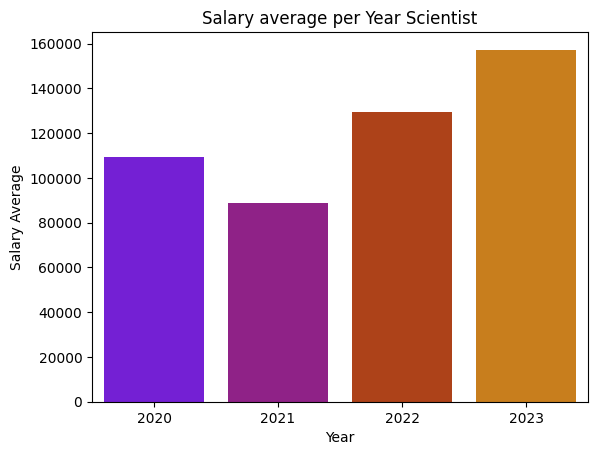

In [17]:
df_sci = df[df['job_title'].str.contains('Scientist', case=False)]
average_salary_df_sci = df_sci.groupby('work_year')['salary_in_usd'].mean()
print(average_salary_df_sci)
print(average_salary_df_sci.mean())

sns.barplot(x=average_salary_df_sci.index, y=average_salary_df_sci.values,palette='gnuplot')
plt.xlabel('Year')
plt.ylabel('Salary Average')
plt.title('Salary average per Year Scientist')
plt.show()

Como podemos observar el salario promedio de los cíentificos es un poco más elevado que el de los ingenieros, tienen un comportamiento similar en estos tres último años, han ido crecienco con valores por encima los ingenieros.

Vamos a ver el salario medio dependiendo del nivel de experiencia:

experience_level
Senior             1569
Mid_level           718
Entry_level         280
Executive_level     101
Name: count, dtype: int64


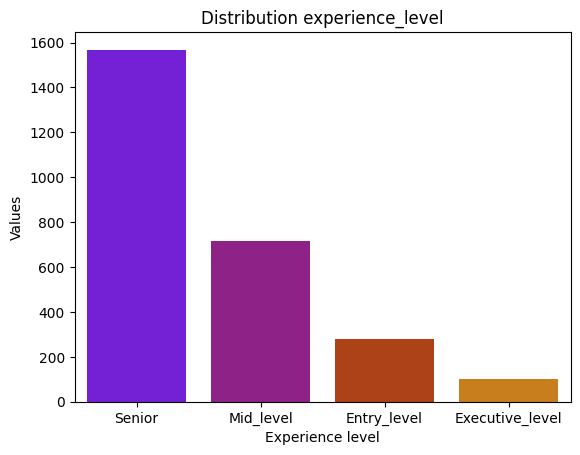

In [18]:
counts_experience_level = df['experience_level'].value_counts()
print(counts_experience_level)

sns.barplot(x=counts_experience_level.index, y=counts_experience_level.values,palette='gnuplot')
plt.xlabel('Experience level')
plt.ylabel('Values')
plt.title('Distribution experience_level')
plt.show()


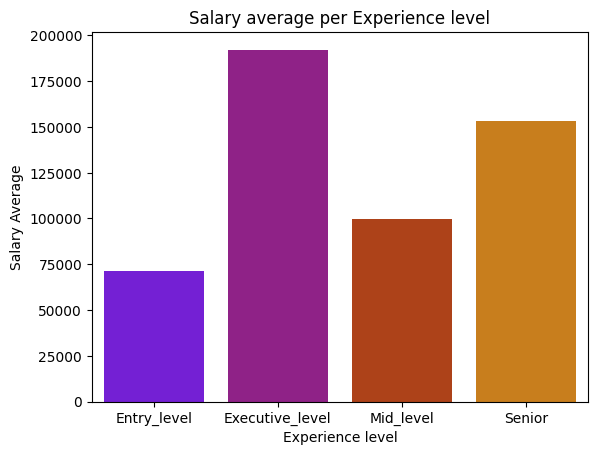

In [19]:
average_salary_experience_level = df.groupby('experience_level')['salary_in_usd'].mean()

sns.barplot(x=average_salary_experience_level.index, y=average_salary_experience_level.values,palette='gnuplot')
plt.xlabel('Experience level')
plt.ylabel('Salary Average')
plt.title('Salary average per Experience level')
plt.show()

Podemos observar una gran diferencia entre el salario medio de 'Senior' y 'Executive-level' con 'Mid-level' y 'Entry-level'.

company_size
Medium    2084
Large      432
Small      152
Name: count, dtype: int64


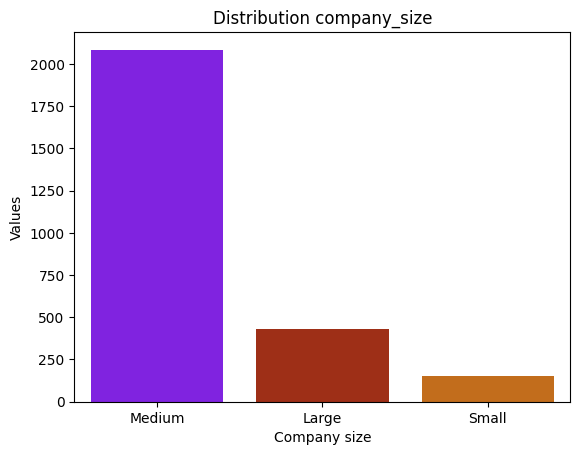

In [20]:
counts_company_size = df['company_size'].value_counts()
print(counts_company_size)

sns.barplot(x=counts_company_size.index, y=counts_company_size.values,palette='gnuplot')
plt.xlabel('Company size')
plt.ylabel('Values')
plt.title('Distribution company_size')
plt.show()


salary_currency
USD    2115
EUR     229
GBP     173
INR      63
CAD      32
AUD      11
PLN       6
BRL       6
SGD       6
CHF       5
Name: count, dtype: int64


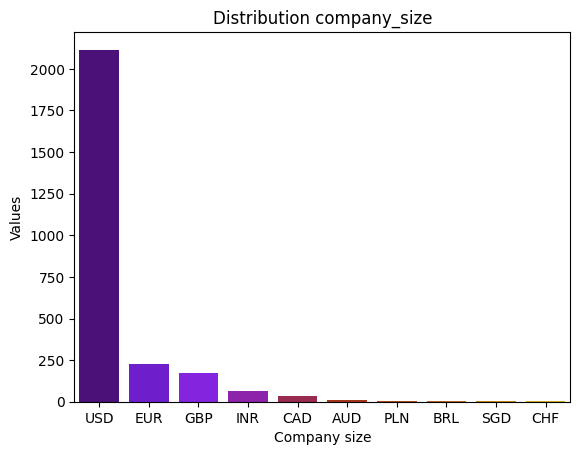

In [21]:
counts_salary_currency = df['salary_currency'].value_counts().head(10)
print(counts_salary_currency)

sns.barplot(x=counts_salary_currency.index, y=counts_salary_currency.values,palette='gnuplot')
plt.xlabel('Company size')
plt.ylabel('Values')
plt.title('Distribution company_size')
plt.show()

remote_ratio
Online          1260
Face-to-face    1212
Blended          196
Name: count, dtype: int64


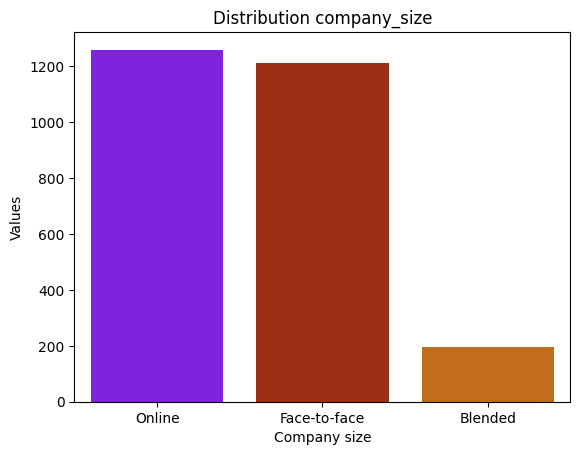

In [22]:
counts_salary_currency = df['remote_ratio'].value_counts().head(10)
print(counts_salary_currency)

sns.barplot(x=counts_salary_currency.index, y=counts_salary_currency.values,palette='gnuplot')
plt.xlabel('Company size')
plt.ylabel('Values')
plt.title('Distribution company_size')
plt.show()

In [23]:
df['Scientist'] = df['job_title'].str.contains('Scientist', case=False).astype(int)
df['Engineer'] = df['job_title'].str.contains('Engineer', case=False).astype(int)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Scientist,Engineer
0,2023,Senior,Full_time,Principal Data Scientist,80000,EUR,85847,ES,Online,ES,Large,1,0
1,2023,Mid_level,Contractual,ML Engineer,30000,USD,30000,US,Online,US,Small,0,1
2,2023,Mid_level,Contractual,ML Engineer,25500,USD,25500,US,Online,US,Small,0,1
3,2023,Senior,Full_time,Data Scientist,175000,USD,175000,CA,Online,CA,Medium,1,0
4,2023,Senior,Full_time,Data Scientist,120000,USD,120000,CA,Online,CA,Medium,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2022,Mid_level,Full_time,Data Engineer,62000,EUR,68147,FR,Online,FR,Medium,0,1
4273,2022,Mid_level,Full_time,Data Scientist,115000,CHF,122346,CH,Face-to-face,CH,Large,1,0
4275,2022,Mid_level,Full_time,Data Scientist,88000,CAD,69336,CA,Online,CA,Medium,1,0
4322,2022,Mid_level,Full_time,Data Analyst,50000,GBP,65438,GB,Face-to-face,GB,Medium,0,0


In [24]:
not_var_dataset_1 = ['salary']
not_var_dataset_2 = ['salary','salary_currency']
not_var_dataset_3 = ['salary_in_usd']
not_var_dataset_4 = ['salary_in_usd','salary_currency']
df_1 = df.drop(not_var_dataset_1, axis=1) #salary_in_usd
df_1 = df_1.rename(columns={'salary_in_usd': 'salary'})
df_2 = df.drop(not_var_dataset_2, axis=1) #salary_in_usd
df_2 = df_2.rename(columns={'salary_in_usd': 'salary'})
df_3 = df.drop(not_var_dataset_3, axis=1)
df_4 = df.drop(not_var_dataset_4, axis=1)  

In [25]:
def convert_to_categorical(df, variable):
    dummies = pd.get_dummies(df[variable], dtype='int',drop_first=False)
    dummies = dummies.rename(columns=lambda x: f"{x}")
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([variable], axis="columns")
    return df

In [26]:
var_categoricals = ['work_year','experience_level','employment_type','job_title','salary_currency','employee_residence','remote_ratio','company_location','company_size']
dfs = [df_1, df_2, df_3, df_4]
not_vars = [not_var_dataset_1, not_var_dataset_2, not_var_dataset_3, not_var_dataset_4]
for index, (d, list_not_var) in enumerate(zip(dfs, not_vars)):
    var_categoricals_act = [v for v in var_categoricals if v not in list_not_var]
    for v in var_categoricals_act:
        dfs[index] = convert_to_categorical(dfs[index], v)
df_1 = dfs[0]
df_2 = dfs[1]
df_3 = dfs[2]
df_4 = dfs[3]

In [27]:
from sklearn.preprocessing import StandardScaler

def normalize_SS(data):
    target_att = 'salary'
    attributes = [k for k in data.keys() if k!= target_att]
    X = data[attributes]
    y = data[[target_att]]
    sc = StandardScaler()
    X_norm = sc.fit_transform(X)
    y_norm = sc.fit_transform(y)
    return [y_norm, X_norm]

def normalize_log(data):
    target_att = 'salary'
    attributes = [k for k in data.keys() if k!= target_att]
    df_m = data+1 # Sumamos 1 porque para normalizar con log no podemos tener 0
    df_log = np.log(df_m)
    df_normalized = (df_log - df_log.min()) / (df_log.max() - df_log.min())
    df_normalized
    X_norm = df_normalized[attributes].to_numpy()
    y_norm = df_normalized[[target_att]].to_numpy()
    return [y_norm, X_norm]

In [28]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

random_state = 50
regressors = {
    'XGB': XGBRegressor(random_state=random_state), 
    'SVR': SVR(),
    'Linear_Regression': LinearRegression(),
    'KN_Regressor': KNeighborsRegressor(),
    'GrandienBoosting_Regressor': GradientBoostingRegressor()
}

datasets = {
    'df1_ss'  : normalize_SS(df_1),
    'df2_ss'  : normalize_SS(df_2),
    'df3_ss'  : normalize_SS(df_3),
    'df4_ss'  : normalize_SS(df_4),
    'df1_log' : normalize_log(df_1),
    'df2_log' : normalize_log(df_2),
    'df3_log' : normalize_log(df_3),
    'df4_log' : normalize_log(df_4),
}

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

test_size = 0.2
random_state = 50

def select_important_features(model, data, threshold='mean'):
    y_norm, X_norm = data
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=test_size, random_state=random_state)
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        selector = SelectFromModel(model, threshold=threshold, prefit=True)
        mask = selector.get_support()
    elif hasattr(model, 'coef_'):
        selector = SelectFromModel(model, threshold=threshold, prefit=True)
        mask = selector.get_support()
    else:
        print(f" --- El model {model.__class__.__name__} no suporta selecció de característiques. S'afageixen totes les variables---")
        mask = np.ones(X_norm.shape[1], dtype=bool)
    X_norm_selected = X_norm[:, mask] if isinstance(X_norm, np.ndarray) else X_norm.loc[:, mask]
    return X_norm_selected, mask

In [30]:
selected_data = {}
for n1, d in datasets.items():
    for n2, model in regressors.items():
        print(f"Seleccionant característiques importants dataset {n1} y model {n2}")
        X_selected, mask = select_important_features(model, d)
        selected_data[f'{n1}_{n2}'] = X_selected
        selected_data[f'{n1}_{n2}_mask'] = mask

Seleccionant característiques importants dataset df1_ss y model XGB
Seleccionant característiques importants dataset df1_ss y model SVR
 --- El model SVR no suporta selecció de característiques. S'afageixen totes les variables---
Seleccionant característiques importants dataset df1_ss y model Linear_Regression
Seleccionant característiques importants dataset df1_ss y model KN_Regressor
 --- El model KNeighborsRegressor no suporta selecció de característiques. S'afageixen totes les variables---
Seleccionant característiques importants dataset df1_ss y model GrandienBoosting_Regressor
Seleccionant característiques importants dataset df2_ss y model XGB
Seleccionant característiques importants dataset df2_ss y model SVR
 --- El model SVR no suporta selecció de característiques. S'afageixen totes les variables---
Seleccionant característiques importants dataset df2_ss y model Linear_Regression
Seleccionant característiques importants dataset df2_ss y model KN_Regressor
 --- El model KNeighb

In [31]:
from sklearn.metrics import r2_score

for n1 in datasets.keys():
    for n2 in regressors.keys():
        X_norm = selected_data[f'{n1}_{n2}']
        y = datasets[f'{n1}'][0]
        X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=test_size, random_state=random_state)

        model = regressors[f'{n2}']
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        print(f'Dataset {n1} i regressor {n2}: r2_train = {r2_train} i r2_test = {r2_test}')

Dataset df1_ss i regressor XGB: r2_train = 0.6439947727803066 i r2_test = 0.38469119187089384
Dataset df1_ss i regressor SVR: r2_train = 0.5316473039438565 i r2_test = 0.41103991423732955
Dataset df1_ss i regressor Linear_Regression: r2_train = 0.36014509542146766 i r2_test = -4.441711148538394e+26
Dataset df1_ss i regressor KN_Regressor: r2_train = 0.46087705082690766 i r2_test = 0.3002108406323566
Dataset df1_ss i regressor GrandienBoosting_Regressor: r2_train = 0.5398739655828758 i r2_test = 0.3818353625093813
Dataset df2_ss i regressor XGB: r2_train = 0.637648417091052 i r2_test = 0.37243552839708505
Dataset df2_ss i regressor SVR: r2_train = 0.5255769241317454 i r2_test = 0.39992319610540317
Dataset df2_ss i regressor Linear_Regression: r2_train = 0.3272768875960169 i r2_test = -3.075719924897697e+26
Dataset df2_ss i regressor KN_Regressor: r2_train = 0.4548532030866389 i r2_test = 0.2962875718649308
Dataset df2_ss i regressor GrandienBoosting_Regressor: r2_train = 0.5300445992056

In [32]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer

random_state = 78
def hyperparameters_search(classifier, params, X_norm, y_norm, cv_splits=10, score='r2'):
    """
        classifier: model 
        param_grids: diccionari de parámetres per fer cerca dels millors
        data: X_norm
        y_data: y_norm
        cv_splits: splits pel kFols
    """
    kfold = KFold(n_splits=cv_splits, random_state=random_state, shuffle=True)
    
    if score == 'r2':
        scoring = make_scorer(r2_score)
    else:
        scoring = score  
    gs = GridSearchCV(estimator=classifier, param_grid=params, cv=kfold, scoring=scoring, n_jobs=-1)
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=50)
    gs.fit(X_train, y_train)
    y_train_pred = gs.predict(X_train)
    y_test_pred = gs.predict(X_test)
    print(f"r2_train = {r2_score(y_train, y_train_pred)} r2_test = {r2_score(y_test, y_test_pred)}")

    return gs.best_params_

In [33]:
xgb_param_grid = {'min_child_weight': [1, 5, 10],
                  'gamma': [0.5, 1, 1.5, 2, 5],
                  'subsample': [0.6, 0.8, 1.0],
                  'colsample_bytree': [0.6, 0.8, 1.0],
                  'max_depth': [3, 4, 5]}
svr_param_grid = {'C': [1, 10, 12, 14, 16],
                  'gamma': [0.001, 0.01, 0.1],
                  'epsilon': [0.001, 0.01, 0.1],
                  'kernel': ["linear", "poly", "rbf", "sigmoid"]}
lr_param_grid = {'fit_intercept': [True, False],
                 'positive': [True, False]}
kn_param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
                 'weights': ['uniform','distance'],
                 'p':[1,2,5]}
gr_param_grid = {'learning_rate': [0.01, 0.1, 0.2],
                 'n_estimators': [100, 200, 300],
                 'max_depth': [3, 5, 7]}

params_grid = {'XGB':xgb_param_grid,
               'SVR':svr_param_grid,
               'Linear_Regression':lr_param_grid,
               'KN_Regressor':kn_param_grid,
               'GrandienBoosting_Regressor':gr_param_grid}

In [34]:
"""
for n1 in datasets.keys():
    for n2 in regressors.keys():
        X_norm = selected_data[f'{n1}_{n2}']
        y_norm = datasets[f'{n1}'][0]
        model = regressors[f'{n2}']
        print(f'Dataset {n1} i regressor {n2}:')
        best_params = hyperparameters_search(model, params_grid[f'{n2}'], X_norm, y_norm)
"""

"\nfor n1 in datasets.keys():\n    for n2 in regressors.keys():\n        X_norm = selected_data[f'{n1}_{n2}']\n        y_norm = datasets[f'{n1}'][0]\n        model = regressors[f'{n2}']\n        print(f'Dataset {n1} i regressor {n2}:')\n        best_params = hyperparameters_search(model, params_grid[f'{n2}'], X_norm, y_norm)\n"

In [ ]:
def abnormal_filter(df, threshold_first=0.05, threshold_second=3):
    # Abnormal values filter for DataFrame df:
    # threshold_first (5%-min or max-95%)
    # threshold_second (second diff., times)
    df_describe = df.describe([.05, .1, .9, .95])
    cols = df_describe.columns.tolist()
    i = 0
    abnorm = 0
    for col in cols:
        i += 1
        # abnormal smallest
        P10_5 = df_describe.loc['10%',col]-df_describe.loc['5%',col]
        P_max_min = df_describe.loc['max',col]-df_describe.loc['min',col]
        if P10_5 != 0:
            if (df_describe.loc['5%',col]-df_describe.loc['min',col])/P10_5 > threshold_second:
                #abnormal smallest filter
                df_antes = df.shape[0]
                df = df[(df[col] >= df_describe.loc['5%',col])]
                print(f"Borramos: {df.shape[0]-df_antes}")
                print('1: ', i, col, df_describe.loc['min',col],df_describe.loc['5%',col],df_describe.loc['10%',col])
                abnorm += 1
        else:
            if P_max_min > 0:
                if (df_describe.loc['5%',col]-df_describe.loc['min',col])/P_max_min > threshold_first:
                    # abnormal smallest filter
                    df_antes = df.shape[0]
                    df = df[(df[col] >= df_describe.loc['5%',col])]
                    print(f"Borramos: {df.shape[0]-df_antes}")
                    print('2: ', i, col, df_describe.loc['min',col],df_describe.loc['5%',col],df_describe.loc['max',col])
                    abnorm += 1

        
        # abnormal biggest
        P95_90 = df_describe.loc['95%',col]-df_describe.loc['90%',col]
        if P95_90 != 0:
            if (df_describe.loc['max',col]-df_describe.loc['95%',col])/P95_90 > threshold_second:
                #abnormal biggest filter
                df_antes = df.shape[0]
                df = df[(df[col] <= df_describe.loc['95%',col])]
                print('3: ', i, col, df_describe.loc['90%',col],df_describe.loc['95%',col],df_describe.loc['max',col])
                print(f"Borramos: {df.shape[0]-df_antes}")
                abnorm += 1
        else:
            if P_max_min > 0:
                if ((df_describe.loc['max',col]-df_describe.loc['95%',col])/P_max_min > threshold_first) & (df_describe.loc['95%',col] > 0):
                    # abnormal biggest filter
                    df_antes = df.shape[0]
                    df = df[(df[col] <= df_describe.loc['95%',col])]
                    print('4: ', i, col, df_describe.loc['min',col],df_describe.loc['95%',col],df_describe.loc['max',col])
                    print(f"Borramos: {df.shape[0]-df_antes}")
                    abnorm += 1
    print('Number of abnormal values =', abnorm)
    return df


In [227]:
def iqr_outlier_filter(df, lower_percentile=0.1, upper_percentile=0.9):
    # Calcular los percentiles
    lower = df.quantile(lower_percentile)
    upper = df.quantile(upper_percentile)

    # Filtrar las filas fuera del rango
    df_filtered = df[(df >= lower) & (df <= upper)].dropna()
    return df_filtered

In [220]:
def z_score_outlier_filter(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    df_filtered = df[(z_scores < threshold).all(axis=1)]
    return df_filtered

In [200]:
processed_data = df.copy()

#processed_data.drop(columns=['work_year', 'job_title', 'salary_currency', 'salary', 'employee_residence', 'company_location'], inplace=True)
processed_data = processed_data.drop(columns=['salary'])
processed_data = processed_data.rename(columns={'salary_in_usd': 'salary'})

#processed_data.columns = ['Exp_level', "Employment_Type", 'Salary', "Remote_Ratio", 'Cmp_Size']

processed_data.tail()


,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
4357,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
4358,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
4359,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
4360,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M
4361,2022,MI,FT,AI Scientist,USD,200000,IN,100,US,L


In [202]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = processed_data.select_dtypes(include=['object']).columns

cat_encoders = {}

# Apply ordinal encoder to categorical columns
for col in categorical_cols:
    encoder = OrdinalEncoder()
    processed_data[col] = encoder.fit_transform(processed_data[[col]].to_numpy())
    cat_encoders[col] = encoder
    
# Final processed data
processed_data.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,3.0,2.0,86.0,8.0,85847,26.0,100,25.0,0.0
1,2023,2.0,0.0,68.0,20.0,30000,75.0,100,70.0,2.0
2,2023,2.0,0.0,68.0,20.0,25500,75.0,100,70.0,2.0
3,2023,3.0,2.0,48.0,20.0,175000,11.0,100,12.0,1.0
4,2023,3.0,2.0,48.0,20.0,120000,11.0,100,12.0,1.0


In [203]:
from sklearn.preprocessing import StandardScaler

# Initialize Standard Scaler
scaler = StandardScaler()

mirror_data = processed_data.copy()
target = mirror_data.pop('salary').to_numpy()
features = mirror_data.to_numpy()

# Apply standard scaler
scalled_data = scaler.fit_transform(features)

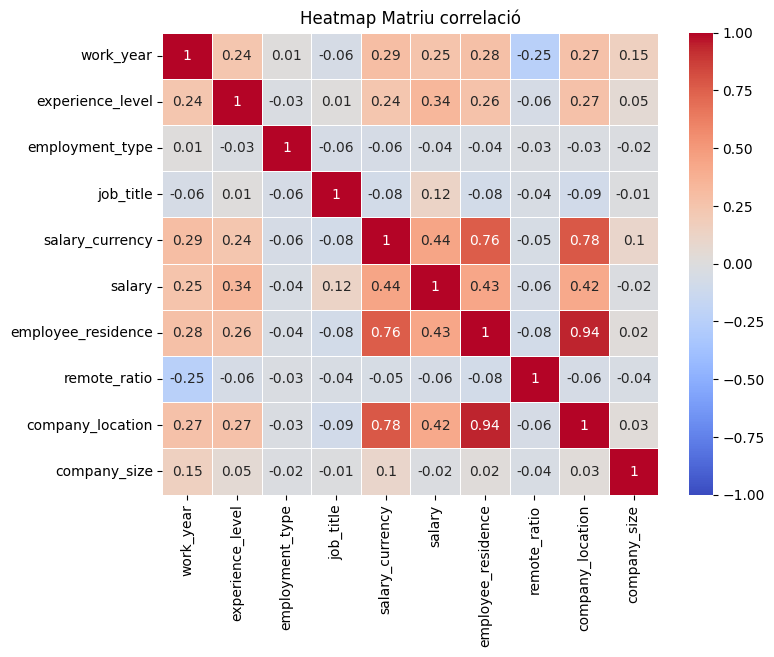

In [204]:
correlation_matrix = processed_data.corr(numeric_only=True).round(2)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Heatmap Matriu correlació")
plt.show()

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4362 non-null   int64 
 1   experience_level    4362 non-null   object
 2   employment_type     4362 non-null   object
 3   job_title           4362 non-null   object
 4   salary              4362 non-null   int64 
 5   salary_currency     4362 non-null   object
 6   salary_in_usd       4362 non-null   int64 
 7   employee_residence  4362 non-null   object
 8   remote_ratio        4362 non-null   int64 
 9   company_location    4362 non-null   object
 10  company_size        4362 non-null   object
dtypes: int64(4), object(7)
memory usage: 375.0+ KB


In [228]:
df_filt = iqr_outlier_filter(processed_data)
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2553 entries, 9 to 4360
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           2553 non-null   float64
 1   experience_level    2553 non-null   float64
 2   employment_type     2553 non-null   float64
 3   job_title           2553 non-null   float64
 4   salary_currency     2553 non-null   float64
 5   salary              2553 non-null   float64
 6   employee_residence  2553 non-null   float64
 7   remote_ratio        2553 non-null   int64  
 8   company_location    2553 non-null   float64
 9   company_size        2553 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 219.4 KB


In [229]:
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.width', None) # display DataFrame without line wrapping

encoder = LabelEncoder()

for col in df_filt.select_dtypes(include="object").columns:
    df_filt[col] = encoder.fit_transform(df_filt[col])

In [230]:
X = df_filt.drop("salary", axis=1)
y = df_filt["salary"]

sc = StandardScaler()
X_norm = sc.fit_transform(X)
y_norm = sc.fit_transform(y.values.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.20)

In [231]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"r2_train = {r2_train} r2_test = {r2_test}")

r2_train = 0.1989675333350196 r2_test = 0.11243584022817987


In [214]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.2)
lasso.fit(x_train, y_train)

y_pred_train = lasso.predict(x_train)
y_pred_test = lasso.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"r2_train = {r2_train} r2_test = {r2_test}")

r2_train = 0.30605324722123584 r2_test = 0.30266051975695996


In [215]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(r2_train)
print(r2_test)

0.5273228482402299
0.40292201776490155


In [94]:
#processed_data_1 = processed_data.drop(["Scientist", "Engineer"], axis=1)
X = processed_data.drop(["salary_in_usd"], axis=1)
y = processed_data["salary_in_usd"]

sc = StandardScaler()
X_norm = sc.fit_transform(X)
y_norm = sc.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.20)

In [ ]:
"""from sklearn.model_selection import train_test_split

X = df.drop(["salary","salary_in_usd"], axis=1)
y = df["salary_in_usd"]
sc = StandardScaler()
X_norm = sc.fit_transform(X)
y_norm = sc.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.20)"""

### Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"r2_train = {r2_train} r2_test = {r2_test}")

r2_train = 0.3084922806894701 r2_test = 0.33256279513693987


In [96]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, max_iter=1000, tol=1.1) 
lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(r2_train)
print(r2_test)

0.26530905614178923
0.3132351636452966


In [97]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(r2_train)
print(r2_test)

0.6539249872504438
0.39435404837113086


In [93]:
from xgboost import XGBRegressor

random_state = 50
xgb = XGBRegressor(random_state=random_state)
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(r2_train)
print(r2_test)

0.5268647203351791
0.4275774121031357


In [60]:
param_grid = { 
            "n_estimators"      : [11,12,13,14,15,16],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
hyperparameters_search(RandomForestRegressor(), param_grid, X_norm, y_norm)

r2_train = 0.5981155530890364 r2_test = 0.3991654197070229


{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 15}

In [137]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = encoder.fit_transform(df[col])
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,86,80000,8,85847,26,100,25,0
1,2023,2,0,68,30000,20,30000,75,100,70,2
2,2023,2,0,68,25500,20,25500,75,100,70,2
3,2023,3,2,48,175000,20,175000,11,100,12,1
4,2023,3,2,48,120000,20,120000,11,100,12,1
...,...,...,...,...,...,...,...,...,...,...,...
4357,2022,3,2,33,154000,20,154000,75,100,70,1
4358,2022,3,2,33,126000,20,126000,75,100,70,1
4359,2022,3,2,25,129000,20,129000,75,0,70,1
4360,2022,3,2,25,150000,20,150000,75,100,70,1


In [162]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outliers = lof.fit_predict(df)

df['Outlier'] = outliers
df_outl = df[df['Outlier'] != -1]
df_outl

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Outlier
0,2023,3,2,86,80000,8,85847,26,100,25,0,1
1,2023,2,0,68,30000,20,30000,75,100,70,2,1
2,2023,2,0,68,25500,20,25500,75,100,70,2,1
3,2023,3,2,48,175000,20,175000,11,100,12,1,1
4,2023,3,2,48,120000,20,120000,11,100,12,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4357,2022,3,2,33,154000,20,154000,75,100,70,1,1
4358,2022,3,2,33,126000,20,126000,75,100,70,1,1
4359,2022,3,2,25,129000,20,129000,75,0,70,1,1
4360,2022,3,2,25,150000,20,150000,75,100,70,1,1


In [163]:
X = df_outl[["experience_level","employment_type","remote_ratio","company_size"]]
y = df_outl["salary_in_usd"]

sc = StandardScaler()
X_norm = sc.fit_transform(X)
y_norm = sc.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.20)

In [164]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(r2_train)
print(r2_test)

0.29620981583190464
0.2528769828445552


In [148]:
X_norm_sf, mask = select_important_features(RandomForestRegressor(),[y_norm, X_norm])

X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X_norm_sf, y_norm, test_size=0.20)

rf = RandomForestRegressor()
rf.fit(X_train_sf, y_train_sf)

y_pred_train = rf.predict(X_train_sf)
y_pred_test = rf.predict(X_test_sf)

r2_train = r2_score(y_train_sf, y_pred_train)
r2_test = r2_score(y_test_sf, y_pred_test)

print(r2_train)
print(r2_test)

0.5046479335457488
0.4605308076899959
